In [1]:
# Optimistic Initial Values, Figure 2.3

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def environment():
    """Returns values and states for 1000 timesteps."""
    values = np.random.normal(size = 10)
    states = np.array([np.random.normal(values) for t in range(1000)])
    return values, states

In [4]:
def agent(initial):
    """Initiates estimated values and action counts."""
    Q = np.full(10, initial).astype(float)
    return Q

In [5]:
def greedy(Q):
    """Picks most valuable action with random tiebreak."""
    best_choices = np.flatnonzero(Q == Q.max())
    greedy_choice = np.random.choice(best_choices)
    return greedy_choice

In [6]:
def explore(Q):
    """Picks a random action."""
    explore_choice = np.random.choice(np.arange(Q.size))
    return explore_choice

In [7]:
def epsilon_greedy(Q, epsilon):
    """Picks a random action with epsilon probabilty. Greedy otherwise."""
    options = ['greedy', 'explore']
    probabilities = [1 - epsilon, epsilon]
    choice = np.random.choice(options, p = probabilities)
    
    if choice == 'greedy':
        return greedy(Q)
    elif choice == 'explore':
        return explore(Q)

In [8]:
def learn_non_stationary(Q, A, R, alpha):
    """Updates value estimate using a constant step-size parameter."""
    Q[A] = Q[A] + (alpha * (R - Q[A]))
    return Q

In [9]:
def run(epsilon, runs, alpha, initial):
    """Return average behavior given epsilon, number of runs, alpha and inital optimism."""
    opt_actions = np.zeros((runs, 1000))

    for run in range(runs):
        values, states = environment()
        Q = agent(initial)

        for t, state in enumerate(states):
            A = epsilon_greedy(Q, epsilon)
            R = state[A]
            Q = learn_non_stationary(Q, A, R, alpha)

            if values.argmax() == Q.argmax():
                opt_actions[run, t] = 1

    action_perc = opt_actions.mean(axis = 0) * 100
    return action_perc

In [10]:
# running for intital values of 0 and 5

runs = 2000
alpha = 0.1

first = run(0.1, runs, alpha, 0); print('First run complete.')
second = run(0, runs, alpha, 5); print('Second run complete.') # inital optimism +5

First run complete.
Second run complete.


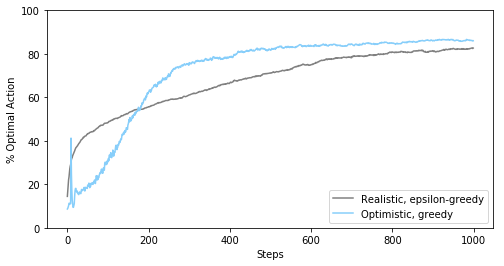

In [11]:
# plotting the results

plt.figure(figsize = (8, 4))
plt.plot(first, color = 'grey', label = 'Realistic, epsilon-greedy')
plt.plot(second, color = 'lightskyblue', label = 'Optimistic, greedy')
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.ylim(top = 100, bottom = 0)
plt.legend(loc = 4)

plt.show()